## 0. Подготовка

В этом листке мы научимся базовой работе с картинками с помощью Питона. 

** Полезные ссылки **:

- <a href="https://pillow.readthedocs.io/en/5.3.x/">Документация PIL</a>
- <a href="https://matplotlib.org/users/colors.html">Цвета в matplotlib</a>

Нам понадобится библиотека *PIL*. Если вы пользуетесь Colab -- она уже установлена. Если вы пользуетесь Jupyter notebook, <a href="https://stackoverflow.com/questions/20060096/installing-pil-with-pip">вот ссылка на инструкцию.</a>

## 1. Как работать с картинками

Импортируем все необходимые библиотеки:

In [1]:
import numpy as np # библиотека для "умной" обработки многомерных массивов.
from PIL import Image
import matplotlib.pyplot as plt

Попробуем открыть картинку:

In [ ]:
# Если вы пользуетесь Google Colab, нужно сначала загрузить картинку на сервер. 
# Запустите этот код и выберите картинку с компьютера.

from google.colab import files
files.upload()

In [2]:
# картинка откроется в новом окне
im = Image.open("Giovanni_Bellini_Sacred_Allegory.jpg")
im.show()

Картинка для нас -- это многомерный массив чисел. Нам нужно хранить отдельно цвет каждого пикселя, то есть нам понадобится массив размера (высота * ширина * 3), потому что цвет пикселя задаётся тремя цветами: разные компоненты отвечают за красный, синий и зелёный. Такая модель называется RGB (red-green-blue). Бывают и другие цветовые модели. Например, принтеры используют модель CMYK на основе четырёх цветов.

В этом листке мы будем пользоваться библиотекой numpy, которая позволяет эффективно работать с массивами. Синтаксис numpy отличается от обычного синтаксиса массивов. Например, получать элемент с координатами x, y, z нужно с помощью оператора [x, y, z], а не [x][y][z]:

In [14]:
python_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
numpy_array = np.array(python_array)
print(python_array[1][2])
print(numpy_array[1, 2])

6
6


Преобразуем нашу картинку в массив и посмотрим на её размер.

In [15]:
image_array = np.asarray(im)
print(image_array.shape)

(609, 1000, 3)


Видим, что у нас картинка высоты 609, ширины 1000, а каждый пиксель задаётся тремя цветами.

## 2. Подробнее о цветах

Цвет каждого пикселя задаётся тремя числами от 0 до 255 -- всего чисел 256. Каждое число характеризует насыщенность ("освещенность") красного, зелёного или синего цвета: (0, 0, 0) соответствует чёрному цвету, (255, 255, 255) -- белому, а, например, (255, 0, 0) -- красному.

### Задача 1. Палитра

Ниже реализована функция, которая позволяет нарисовать кружок данного цвета. В качестве цвета можно передавать массив из трёх элементов -- цвет точки. 

В matplotlib цвет нужно передавать не от 0 до 255, а от 0 до 1, то есть 255 будет соответствовать единице, а 0 -- нулю.

Выпишите ниже формулу, которая преобразует число от 0 до 255 в число от 0 до 1. Реализуйте соотвествующую функцию.

Формула:


<напишите тут формулу>

In [ ]:
def get_float_color(color): # реализуйте тут функцию
    assert len(color) == 3, "Цвет должен быть массивом длины 3"
    assert 0 <= color[0] <= 255 and 0 <= color[1] <= 255 and 0 <= color[2] <= 255, "Все цвета должны быть числами от 0 до 255"
    # ваш код
    color_zero_one = ...
    return color_zero_one
    

In [6]:
def draw_circle(color): # функция, которая рисует кружок, её изменять не надо
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.scatter([0], [0], s=10000, color=color)
    plt.show()

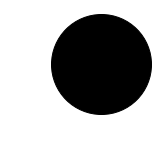

In [7]:
draw_circle((0, 0, 0))

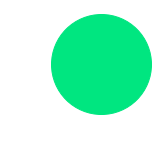

In [8]:
draw_circle((0, 0.9, 0.5))

*Задание:* Нарисуйте кружки следующих цветов:

- серо-буро-малиновый
- индиго
- персиковый
- фуксия
- кирпичный

(просто подберите числа для функции draw_circle, чтобы получился примерно такой цвет).

In [ ]:
# ваш код


## Задача 2. Какого цвета картинка?

Картинки часто бывают довольно разноцветные. Но что мы будем видеть, если отойдём от неё на большое расстояние? Логично предположить, что близкие пиксели для глаза будут сливаться в точку одного цвета. Наверное, цвет такой общей точки будет примерно средним арифметическим от цвета входящих в неё точек. Мы может посчитать такое среднее арифметическое отдельно по каждой компоненте цвета. Например, для цветов (0, 0, 1), (1, 1, 0) средним будет (0.5, 0.5, 0.5).

Напишите функцию, которая принимает на вход картинку и возвращает средний цвет всех пикселей этой картинки. Запустите эту функцию от картинки выше ("Sacred Allegory" Джованни Беллини).


In [ ]:
def mean_color(picture):
    # ваш код

## Задача 3. Расстояние между цветами
Для следующей задачи нам потребуется находить цвета, которые "близки" друг к другу. Например, розовый ближе к красному, чем к зелёному.

Давайте считать, что каждый цвет -- это точка в трёхмерном пространстве. Давайте считать расстояние между цветами просто обычным (евклидовым) расстоянием между двумя точками, которое задаётся формулой (эта формула следует из теоремы Пифагора):

$$d(c_1, c_2) = \sqrt{(r_1 - r_2)^2 + (g_1 - g_2)^2 + (b_1 - b_2)^2},$$

где $c_1 = (r_1, g_1, b_1), c_2 = (r_2, g_2, b_2)$.

Реализуйте вычисление расстояния между двумя заданными цветами.

In [ ]:
def dist(color1, color2):
    # ваш код
    return d

# 3. Картинки из картинок

## Задача 4

От вас требуется реализовать класс, который обладает следующим функционалом:

1. Собирает все картинки, лежащие в папке с ноутбуком и названные 1.jpg, 2.jpg, 3.jpg и т.д. Умеет показывать картинку по её номеру (прямо в ноутбуке)
2. Имеет метод get_cropped(i, size), который возвращает картинку с номером i, обрезанную (как угодно) до размера size (размер -- это массив из двух элементов).
2. (*) Имеет метод get_resized(i, size), который возвращает картинку с номером i, уменьшенную до размера size, при этом цвет каждого пикселя -- среднее арифметическое цветов нескольких пикселей вокруг.
3. (**) Имеет метод get_pixelart(pic), который принимает на вход другую картинку и проделывает следующее:
    - из всех имеющихся у нас картинок находит самую близкую по цвету к каждому пикселю картинки pic
    - отрисовывает картинку pic, заменив каждый пиксель самой подходящей картинкой.
Найдите в Интернете картинки с выраженным цветом, и попробуйте с помощью этих картинок нарисовать картинку той же тематики. Например, портрет из портретов или картину Ван Гога из картин Ван Гога. 
4. Код должен проходить онлайн-проверку стиля PEP-8.

Обратите внимание! Код этой задачи нужно сохранить в отдельном файле .py. По этой задаче будет code-review, то есть помимо правильности работы программы будет проверено то, что соблюдён стиль кода. Если ваш код генерирует больше 2 предупреждений в <a href="http://pep8online.com/">PEP-8</a>, он оценивается в 0 баллов.